# Calibration of AWGN 
The purpose of this notebook is to:
1. Align the the results of injecting Additive White Gaussian Noise to the MATLAB result.
2. Demonstrate how to use modulationFunctions.py, channelFunctions.py

The SNR <--> BER plot below is taken from MATLAB, and corresponds to the values in the next cell (ebn0 and berPam4UncodedMATLAB_0_0_5_18)

![title](./pam4MATLAB.png)

## Reading and relevant material
Modulation penalty with a good explanation about the error occurance in PMA4 https://www.ieee802.org/3/bs/public/adhoc/smf/15_12_01/king_01_1215_smf.pdf

I would add to it the explanation from Proakis (Probability of error for M-arry PAM):

"Recall that M-ary PAM signals are represented geometrically as M one dimensional signal points with value:
s_m = sqrt((1/2) * epsilon_g) * A_m for m=1,2...M
where epsilon_g is the energy of the basic signal pulse g(t). The amplitude values may be expressed as
A_m = (2*m - 1 - M)*d m=1,2...M"
In our case:
M = 4
A1 = -1
A2 = -1/3
A3 = 1/3
A4 = 1
And so:
A1 = (2*1-1-4)*d = -3*d
A2 = (2*2-1-4)*d = -1*d
A3 = (2*3-1-4)*d =  1*d
A4 = (2*4-1-4)*d =  3*d

So we conclude that d == 1/3.

"where the Euclidean distance between points is d * sqrt(2 * epsilon_g)"

So in our case, plugging d == 1/3, and Euclidean distance between points == 2/3 we have:

2/3 = d * sqrt(2 * epsilon_g)
-->
2/3 = 1/3 * sqrt(2 * epsilon_g)
-->
((3 * 2/3) ^2) / 2 = epsilon_g
-->
epsilon_g = (2^2)/2 = 2

"Equivalently we may characterize these signals in terms of their average power, which is:
P_av = epsilon_av / T  =1/6 * (M^2 -1) * (d^2) * epsilon_g / T"
So in our case:
P_av = (1/6) * (4^2 - 1) * (d^2) * epsilon_g / T
plugging d == 1/3:
P_av = (1/6) * (4^2 - 1) * (d^2) * (1/3) / T = 1/6 * 15 * 1/9 * 1/3 * T = 15/162 * T

"The placing of the thresholds as shown in figure 5-2-7 helps in evaluating the probability of error. We note that if the mth amplitude level is transmitted, the demodulator output is:
r = s_m + n = sqrt((1/2)*epsilon_g)* A_m + n
where the noise variable n has zero mean and variance (sigma_n)^2 = (1/2)*N_0.
On the basis that all amplitude levels are equally likely a priori, the average The probability of a symbol (!) error is simply the probability that the noise variable n exceeds in magnitude on-half of the distance between levels. However, when either one of the two outside levels +-(M-1) is transmitted, an error can occur in one direction only. Thus we have: 
P_M = (M-1)/M * P(|r-s_m| > d*sqrt( (1/2)*epsilon_g) )" 

So in our case:
P_4 = 2 * (4-1)/4 * Q(sqrt(d^2 * epsilon_g / N_0)) = 2 * (4-1)/4 * Q(sqrt((1/3)^2 * 2 / N_0))

Skipping a few lines:
"In plotting the probability of a symbol error for M-ary signals such as M-ary PAM, it is customary to use the SNR per bit as the basic parameter. Since T = k*T_b and k = log_2(M), 5-2-45  may be expressed as
P_M = 2*(M-1)/M * Q(sqrt( (6*log_2(M)) * epsilon_{b av} / ( (M^2 -1)*N_0 )) )
where epsilon_{b av}=P_av*T_b is the average bit energy and e_{b av}/N0 is the average SNR per bit."

So in our case, if the SNR axis is 10log10(epsilon_{b av}/N_0), then the probability of symbol error is:
P_4 = 2*(4-1)/4 * Q(sqrt( (6*log_2(4)) * epsilon_{b av} / ( (4^2 -1)*N_0 )) )

Then to move from SER to BER I used a factor of 3/4 - this needs checking + explanation.

The alignment is pretty close, but not completely aligned (see figure below). 


Then I plot an experimental pam4 modulated data + awgn noise, but my translation from linear EbN0 to AWGN is off (not sure why yet) so I currently have a correction factor to make it align with the data.

Until I figure out the right translation, I'll use the correction factor. 

In [48]:
import numpy as np
LOCAL_PRNG = np.random.RandomState()
berPam4UncodedMATLAB_0_0_5_18 = np.array([0.140980000000000,0.129900000000000,0.119000000000000,0.108270000000000,0.0977420000000000,0.0874510000000000,0.0774530000000000,0.0678180000000000,0.0586240000000000,0.0499550000000000,0.0418930000000000,0.0345110000000000,0.0278710000000000,0.0220160000000000,0.0169670000000000,0.0127200000000000,0.00924720000000000,0.00649530000000000,0.00439030000000000,0.00284270000000000,0.00175420000000000,0.00102570000000000,0.000564710000000000,0.000290600000000000,0.000138660000000000,6.07860000000000e-05,2.42340000000000e-05,8.68610000000000e-06,2.76320000000000e-06,7.68970000000000e-07,1.84190000000000e-07,3.72860000000000e-08,6.25020000000000e-09,8.47880000000000e-10,9.07160000000000e-11,7.43680000000000e-12,4.52230000000000e-13])
ebn0 = np.arange(0,18.5,0.5)

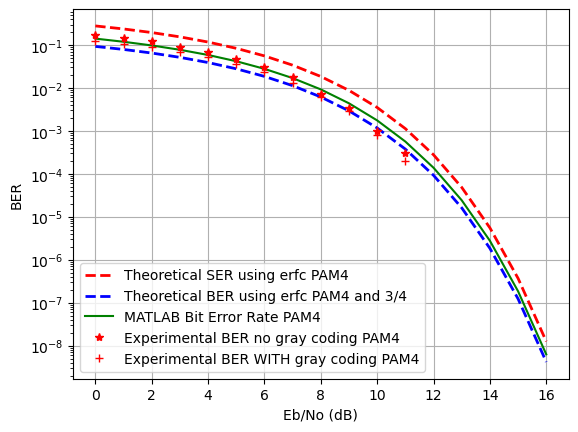

In [51]:
# The following is based on https://scipy-cookbook.readthedocs.io/items/CommTheory.html, and I expanded it to PAM4
import os, sys
ieeeProjectDir = os.environ.get('IEEE8023')
if ieeeProjectDir == None: 
     ieeeProjectDir = "c:/users/omer/802.3/"
sys.path.insert(0, ieeeProjectDir)
import numpy as np
import modulationFunctions as mf
from scipy.special import erfc
import matplotlib.pyplot as plt
#berPam2MATLAB_0_1_16 = np.array([0.0786500000000000,0.0562820000000000,0.0375060000000000,0.0228780000000000,0.0125010000000000,0.00595390000000000,0.00238830000000000,0.000772670000000000,0.000190910000000000,3.36270000000000e-05,3.87210000000000e-06,2.61310000000000e-07,9.00600000000000e-09,1.33290000000000e-10,6.81020000000000e-13,9.12400000000000e-16,2.26740000000000e-19])
berPam4MATLAB_0_1_16 = np.array([0.140980000000000,0.119000000000000,0.0977420000000000,0.0774530000000000,0.0586240000000000,0.0418930000000000,0.0278710000000000,0.0169670000000000,0.00924720000000000,0.00439030000000000,0.00175420000000000,0.000564710000000000,0.000138660000000000,2.42340000000000e-05,2.76320000000000e-06,1.84190000000000e-07,6.25020000000000e-09])

SNR_MIN     = 0
SNR_MAX     = 16
M = 4 # Number of PAM levels
AVERAGE_POWER_PER_BIT_PAM4 = 1 #Currently 1, as half of epsilon_g which is 2
CORRECTION_FACTOR = 0.5 # This factor is meant to be removed once I figure out the right conversion from linear SNR to noise
PAM4_SER_TO_BER = 3/4 # This needs checking and explaining.
pam4SymbolPowerAverage = 1/4 * (1 + 1 + (2/3)**2 + (-2/3)**2)
EbN0_dB    = np.arange(SNR_MIN,SNR_MAX+1,1)
EbN0_linear        = 10**(EbN0_dB/10.0)  # linear SNR

Pe          = np.empty(EbN0_linear.shape) #Probability of error
BER         = np.empty(EbN0_linear.shape) #Bit error rate
probabilityOfSymbolErrorPam4          = np.empty(EbN0_linear.shape) #Probability of error for PAM4
BerStatsPam4GrayCoded         = np.empty(EbN0_linear.shape) #Bit error rate with Gray coding
BerStatsPam4NoGrayCoding      = np.empty(EbN0_linear.shape) ##Bit error rate WITHOUT Gray coding


def Q(x):
    return (1/2) * erfc(x / np.sqrt(2))

loop = 0
for snr in EbN0_linear:      # SNR loop
    # First, calculate the analytic probability of error for NRZ
    #Pe[loop] = 0.5*erfc(np.sqrt(snr))
    
    x = np.sqrt( (6 * np.log2(M) / (M**2 - 1)) * snr ) 
    y = (2*(M-1)/M)
    probabilityOfSymbolErrorPam4[loop] = y * Q(x) #y  *erfc(x) 
    #VEC_SIZE = np.int32(10 * np.ceil(100/Pe[loop]))  # vector length is a function of Pe
    VEC_SIZE = 10000
    # signal vector, new vector for each SNR value
    data = np.random.randint(low = 0, high = 2, size = VEC_SIZE)
    modulatedDataNoGrayCoding, pam4SymbolsNoGrayCoding, _ = mf.modulatePAM4(data, grayCoding=False, precoding=False)
    modulatedDataGrayCoded, pam4SymbolsGrayCoded, _ = mf.modulatePAM4(data, grayCoding=True, precoding=False)
        
    # noise
    #n = np.sqrt(No/2)*np.random.randn(VEC_SIZE)
    noisePam4 = LOCAL_PRNG.normal(0, CORRECTION_FACTOR * np.sqrt(0.5 * (AVERAGE_POWER_PER_BIT_PAM4 / snr)), len(modulatedDataNoGrayCoding)) #1/snr) * np.random.randn(len(modulatedDataNoGrayCoding))    

    # signal + noise
    noisyDataNoGrayCoding = modulatedDataNoGrayCoding + noisePam4
    noisyDataGrayCoded = modulatedDataGrayCoded + noisePam4
     

    # decode received signal + noise
    pam4SymbolsNoGrayCoding, error, classifier = mf.pam4Slice(noisyDataNoGrayCoding)
    pam4SymbolsGrayCoded, error, classifier = mf.pam4Slice(noisyDataGrayCoded)
    
    dataRxNoGrayCoding = mf.pam4SymbolsToBits(pam4SymbolsNoGrayCoding, grayCoded= False)
    dataRxGrayCoded = mf.pam4SymbolsToBits(pam4SymbolsGrayCoded, grayCoded= True)
    

    # find erroneous symbols
    berPam4GrayCoded = np.sum(dataRxGrayCoded != data) / VEC_SIZE
    berPam4NoGrayCoding = np.sum(dataRxNoGrayCoding != data) / VEC_SIZE
    BerStatsPam4GrayCoded[loop] = berPam4GrayCoded
    BerStatsPam4NoGrayCoding[loop] = berPam4NoGrayCoding
    BER[loop] = error_sum/VEC_SIZE
    #print ('Eb_No_dB=%4.2f, BER=%10.4e, Pe=%10.4e' % (EbN0_dB[loop], BER[loop], Pe[loop]))
    loop += 1

#plt.semilogy(Eb_No_dB, Pe,'r',Eb_No_dB, BER,'s')
#plt.semilogy(EbN0_dB, Pe,'r',linewidth=2, label = "Theoretical BER using erfc NRZ")
plt.semilogy(EbN0_dB, probabilityOfSymbolErrorPam4,'--r',linewidth=2, label = "Theoretical SER using erfc PAM4")
plt.semilogy(EbN0_dB, PAM4_SER_TO_BER * probabilityOfSymbolErrorPam4,'--b',linewidth=2, label = "Theoretical BER using erfc PAM4 and 3/4")
#plt.semilogy(EbN0_dB, BER,'-s', label = "Experimnetal ber NRZ")
#plt.semilogy(EbN0_dB, berPam2MATLAB_0_1_16, '+g', label = "MATLAB extract NRZ")
plt.semilogy(EbN0_dB, berPam4MATLAB_0_1_16, '-g', label = "MATLAB Bit Error Rate PAM4")
plt.semilogy(EbN0_dB, BerStatsPam4NoGrayCoding, '*r', label = "Experimental BER no gray coding PAM4")
plt.semilogy(EbN0_dB, BerStatsPam4GrayCoded, '+r', label = "Experimental BER WITH gray coding PAM4")
plt.grid(True)
plt.legend()
plt.xlabel('Eb/No (dB)')
plt.ylabel('BER')
plt.show()